## **First Step 🛠️**

- Import Libraries 📚
    - I import necessary libraries for data manipulation, visualization, and database connections.
- Setup Environment ⚙️
    - Add the src folder to the system path for importing custom modules.
- Establish Database Connection 🔗
    - Create an instance of the PostgreSQLConnection class to interact with the database.
- Configure DataFrame Display Options 🖥️
    - Adjust pandas settings to ensure full visibility of DataFrame columns and contents.
- Create DataFrame 📊
    - Execute an SQL query to load data from the Spotify staging table into a DataFrame.
- Preview Data 👀
    - Display the first 5 rows of the DataFrame to understand its structure.
- Check Data Shape 📏
    - Output the number of rows and columns in the DataFrame.
- Detect Duplicates ❌
    - Identify and count duplicate rows to ensure data quality.


In [66]:
# Import Libraries
import sys  # System-specific parameters and functions
import os  # Operating system interfaces
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting library for creating visualizations
import seaborn as sns  # Statistical data visualization library
from urllib.parse import urlparse  # Parse URLs into components
import re  # Regular expressions for string manipulation

# Add the 'src' folder to sys.path to enable importing from it
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Import previously created classes from custom modules
from connections.db import PostgreSQLConnection  # Database connection class
from utils.data_analysis_functions import DataAnalyzer  # Data analysis functions class

# Create an instance of the PostgreSQLConnection class
db_service = PostgreSQLConnection()


In [67]:
# Set display options for DataFrame columns
pd.set_option('display.max_columns', None)  # Set to None to display all columns without limitation
pd.set_option('display.max_colwidth', None)  # Do not limit the width of column content
pd.set_option('display.expand_frame_repr', False)  # Prevent pandas from breaking the DataFrame into multiple lines


In [68]:
# Create a DataFrame from the Spotify staging table
grammy_data = db_service.create_dataframe('../sql/queries/select_all_rows.sql', 'grammy_staging')  
# Execute the SQL query located at the specified path and create a DataFrame named 'grammy_data' from the 'grammy_staging' table

# Display the first 5 rows of the DataFrame
grammy_data.head(5)  # Show the top 5 entries to understand the structure and content of the DataFrame


✓ DataFrame created successfully.


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O Connell, producer Rob Kinelski & Finneas O Connell, engineers/mixers John Greenham, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Billie%2BEilish/Billie%2520Eilish_1_1_1594138954.jpg?itok=3-71Dfxh,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin Vernon, producers BJ Burton, Zach Hanson & Chris Messina, engineers/mixers Greg Calbi, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Bon%2BIver/Bon%2520Iver_1_1_1578385181.jpg?itok=_M1hc5Ux,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster & Victoria Monet, producers Serban Ghenea, John Hanes, Billy Hickey & Brendan Morawski, engineers/mixers Randy Merrill, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Ariana%2BGrande/Ariana%2520Grande_1_1_1578384678.jpg?itok=Amj90j13,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer Joseph Hurtado, Jaycen Joshua, Derek Keota & Miki Tsutsumi, engineers/mixers Colin Leonard, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/H.E.R./H.E.R._1_1_1594631035.jpg?itok=ClJe-2MN,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers Ingmar Carlson, Jon Castelli, Josh Deguzman, John Kercy, Denis Kosiak, Guy Lawrence & Michael Romero, engineers/mixers Dale Becker, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Khalid/Khalid_1_1_1594578772.jpg?itok=2HxjAT-X,True


In [69]:
# Display the number of rows and columns in the DataFrame
print(grammy_data.shape)  # Outputs a tuple representing the dimensions of the DataFrame (rows, columns)


(4810, 10)


In [70]:
# Check for duplicate rows in the DataFrame
duplicates = grammy_data[grammy_data.duplicated()]  # Create a new DataFrame containing only duplicated rows

# Count the number of duplicate rows
num_duplicates = duplicates.shape[0]  # Get the number of rows in the duplicates DataFrame

# Print the count of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")  # Output the count of duplicate entries


Number of duplicate rows: 0


## **Second Step: 🧩🔍**
- 📊 Identify Null Values: Records in the dataset that contain at least one null value will be filtered to assess data quality.
- 🔍 Count Null Rows: The number of rows with missing values will be counted to understand the extent of incomplete data.
- 🗣️ Display Results: The count of rows containing null values will be printed for reference and further analysis.

In [71]:
# Import the DataAnalyzer class to analyze numerical data
analyzer_statistic = DataAnalyzer(grammy_data)  # Create an instance of DataAnalyzer, passing the 'grammy_data' DataFrame for analysis


In [72]:
# Analyze categorical data using the analyzer_statistic instance
analyser_categorical = analyzer_statistic.analize_categorical_data(grammy_data.columns)  
# Call the 'analize_categorical_data' method on the 'analyzer_statistic' instance, passing in the columns of 'grammy_data' for analysis
analyser_categorical

,Column Name,Data Type,Unique Values,Repeated Values,Missing Values,Number of Duplicates,count,unique,top,freq
0,artist,object,1658,3152,1840,3151,2970,1658,(Various Artists),66
1,category,object,638,4172,0,4172,4810,638,Song Of The Year,70
2,img,object,1463,3347,1367,3346,3443,1463,https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/John%2BWilliams/John%2520Williams_1_1_1597170495.jpg?itok=GsnrkP98,26
3,nominee,object,4131,679,6,678,4804,4131,Robert Woods,7
4,published_at,object,4,4806,0,4806,4810,4,2017-11-28T00:03:45-08:00,4205
5,title,object,62,4748,0,4748,4810,62,62nd Annual GRAMMY Awards (2019),433
6,updated_at,object,10,4800,0,4800,4810,10,2019-09-10T01:08:19-07:00,778
7,winner,bool,1,4809,0,4809,4810,1,True,4810
8,workers,object,2366,2444,2190,2443,2620,2366,"John Williams, composer (John Williams)",20
9,year,int64,62,4748,0,4748,4810,62,2019,433


In [73]:
# Filter the records that contain at least one null value
null_values = grammy_data[grammy_data.isnull().any(axis=1)]  
# Create a DataFrame containing only the rows from 'grammy_data' that have at least one null value

# Print the number of rows with at least one null value
print(f"The number of rows with at least one null value is {null_values.shape[0]}")  
# Output the count of such rows to understand the extent of missing data in the DataFrame


The number of rows with at least one null value is 3976


## **Third Step: 🔎📊**
- 🕵️ Investigate Columns: The dataset's columns will be examined to understand their context and significance.
- 💡 Identify Insights: This step aims to uncover interesting patterns, trends, or anomalies within the data.
- 📈 Contextual Analysis: Understanding the data structure will facilitate deeper analysis and interpretations, guiding further exploration of the dataset.

- **Published_at Column: 📅**
    1. 🔍 Data Extraction: The published_at column is extracted from the grammy_data DataFrame for further analysis.
    2. 📊 Bar Chart Creation: A bar chart is generated to visualize the number of songs published by year using Seaborn's countplot.
    3. 🏷️ X-Axis Labeling: The x-axis label is customized to "Year of Publication" for clarity.
    4. 📈 Chart Display: The final chart is displayed, providing insights into publication trends over the years.

In [75]:
# Extract the 'published_at' column from the grammy_data DataFrame
published_at_column = grammy_data['published_at']  
# Store the 'published_at' column data in a variable for further analysis or manipulation


In [81]:
# Display the first 5 entries of the published_at_column column
published_at_column.head(5)  
# This will show the initial rows of the 'published_at_column' data, providing insight into its format and values

0    2020-05-19T05:10:28-07:00
1    2020-05-19T05:10:28-07:00
2    2020-05-19T05:10:28-07:00
3    2020-05-19T05:10:28-07:00
4    2020-05-19T05:10:28-07:00
Name: published_at, dtype: object

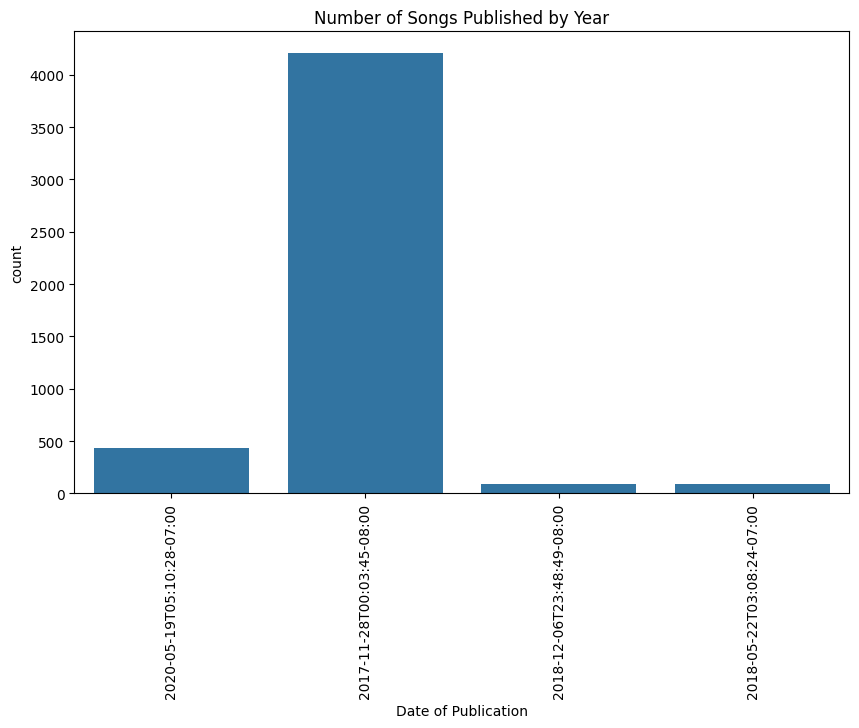

In [82]:
# Create a bar chart to visualize the number of songs published by year
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.countplot(x='published_at', data=grammy_data)  # Use Seaborn's countplot to count occurrences of 'published_at'
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.title('Number of Songs Published by Year')  # Set the title of the chart
plt.xlabel('Date of Publication')  # Set the x-axis label
plt.show()  # Display the chart


- **Updated_at Column: 🕒**
    1. 📊 Count Occurrences: Count the number of updates for each date in the updated_at column to understand how frequently updates occur.
    2. 📈 Create Bar Chart: Generate a bar chart to visually represent the number of updates over time, using the counts calculated earlier.
    3. 🎨 Customize Chart: Set titles and labels for the chart to enhance clarity and readability, including rotating the x-axis labels for better visibility.
    4. 🖼️ Display Chart: Finally, show the chart to visualize the trends in updates, allowing for easy analysis of the data.

In [84]:
# Extract the 'updated_at_column' column from the grammy_data DataFrame
updated_at_column = grammy_data['updated_at']  
# Store the 'updated_at' column data in a variable for further analysis or manipulation


In [86]:
# Display the first 5 entries of the 'updated_at_column' column
updated_at_column.head(5)  # Preview the initial values to understand the date format and data


0    2020-05-19T05:10:28-07:00
1    2020-05-19T05:10:28-07:00
2    2020-05-19T05:10:28-07:00
3    2020-05-19T05:10:28-07:00
4    2020-05-19T05:10:28-07:00
Name: updated_at, dtype: object

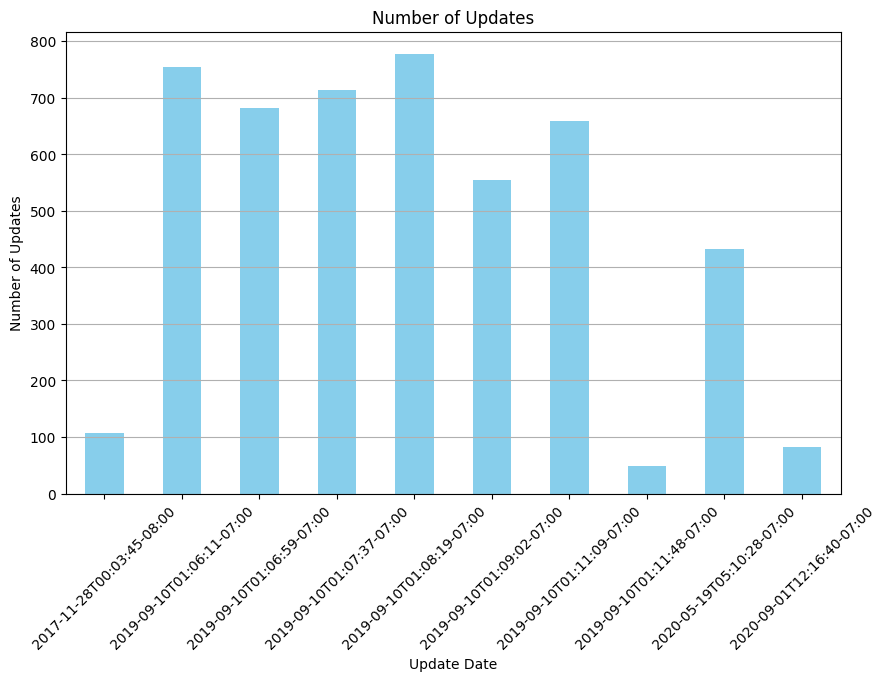

In [87]:
# Count the number of occurrences of updates by date
count_by_year = updated_at_column.value_counts().sort_index()  # Aggregate counts and sort by index (date)

# Create a bar chart to visualize the number of updates
plt.figure(figsize=(10, 6))  # Set the size of the figure for better visibility
count_by_year.plot(kind='bar', color='skyblue')  # Plot the counts as a bar chart with a specific color
plt.title('Number of Updates')  # Set the title of the chart
plt.xlabel('Update Date')  # Label the x-axis
plt.ylabel('Number of Updates')  # Label the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add a grid on the y-axis for easier visualization

# Show the chart
plt.show()  # Display the final chart


- **📸 Image Column Steps:**
    1. 🔧 Define the Function: Create the is_valid_url function to check if URLs in the img column are valid. This function will ensure that URLs are not None, not NaN, and contain both a scheme and a netloc.
    2. 📊 Apply the Function: Use the apply method on the img column in the grammy_data DataFrame to generate a boolean mask that indicates the validity of each URL.
    3. ✅ Check Validity: Evaluate if there are valid URLs or if all entries in the img column are None or NaN, and store the result.
    4. 🖨️ Print Result: Display a message indicating whether all entries in the img column are valid URLs.

In [89]:
# Extract the 'img' column from the grammy_data DataFrame
img_column = grammy_data['img']  # Store the image URLs or data related to the Grammy entries for further analysis or visualization


In [90]:
# Display the first 5 entries of the 'img' column from the grammy_data DataFrame
img_column.head(5)  # Preview the image data or URLs to get an initial understanding of the content stored in this column


0    https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Billie%2BEilish/Billie%2520Eilish_1_1_1594138954.jpg?itok=3-71Dfxh
1              https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Bon%2BIver/Bon%2520Iver_1_1_1578385181.jpg?itok=_M1hc5Ux
2    https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Ariana%2BGrande/Ariana%2520Grande_1_1_1578384678.jpg?itok=Amj90j13
3                        https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/H.E.R./H.E.R._1_1_1594631035.jpg?itok=ClJe-2MN
4                        https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Khalid/Khalid_1_1_1594578772.jpg?itok=2HxjAT-X
Name: img, dtype: object

In [91]:
# Function to check if a URL is valid
def is_valid_url(url):
    """
    Check if a given URL is valid.

    Args:
        url (str): The URL to be validated.

    Returns:
        bool: True if the URL is valid, False otherwise. A valid URL is defined as:
              - Not None
              - Not NaN
              - Has a scheme (e.g., 'http', 'https')
              - Has a netloc (domain name)

    """
    return url is not None and not pd.isna(url) and all([urlparse(url).scheme, urlparse(url).netloc])

# Apply the function to the 'img' column and create a boolean mask
validity_mask = grammy_data['img'].apply(is_valid_url)

# Check if there are valid URLs or if all entries are None or NaN
all_urls_valid = validity_mask.sum() > 0 or all(pd.isna(val) or val is None for val in grammy_data['img'])

# Print the result of the validation check
print(f"All data in the 'img' column are valid URLs: {all_urls_valid}.")


All data in the 'img' column are valid URLs: True.


- **Artist Column 🎤**
    1. 📥 First, extract the 'artist' column from the grammy_data DataFrame to focus on the artist information.
    2. 📊 Count the number of unique artists present in the dataset and display the quantity of each artist.
    3. 📅 Group the data by year to count how many unique artists were nominated each year.
    4.  📈 Create a line chart to visualize the number of unique artists over the years, enhancing the understanding of trends in nominations.

In [92]:
# Extract the 'artist' column from the Grammy DataFrame
artist_column = grammy_data['artist']  # Store the 'artist' data for further analysis or manipulation


In [93]:
# Display the first 5 rows of the 'artist' column from the Grammy DataFrame
artist_column.head(5)  # This helps in previewing the data to understand the structure and content of the 'artist' column


0    Billie Eilish
1         Bon Iver
2    Ariana Grande
3           H.E.R.
4           Khalid
Name: artist, dtype: object

In [94]:
# Count the unique records in the 'artist' column and their respective quantities
# This will show how many times each artist appears in the dataset.
print(f"The count of unique artists in the dataset and their respective quantities are as follows:\n{artist_column.value_counts()}")


The count of unique artists in the dataset and their respective quantities are as follows:
artist
(Various Artists)                  66
U2                                 18
Aretha Franklin                    16
Stevie Wonder                      13
Bruce Springsteen                  13
                                   ..
Frank Sinatra And Original Cast     1
Norman Luboff Choir                 1
Eydie Gorme & Steve Lawrence        1
Shawn Mendes & Camila Cabello       1
Jonas Brothers                      1
Name: count, Length: 1658, dtype: int64


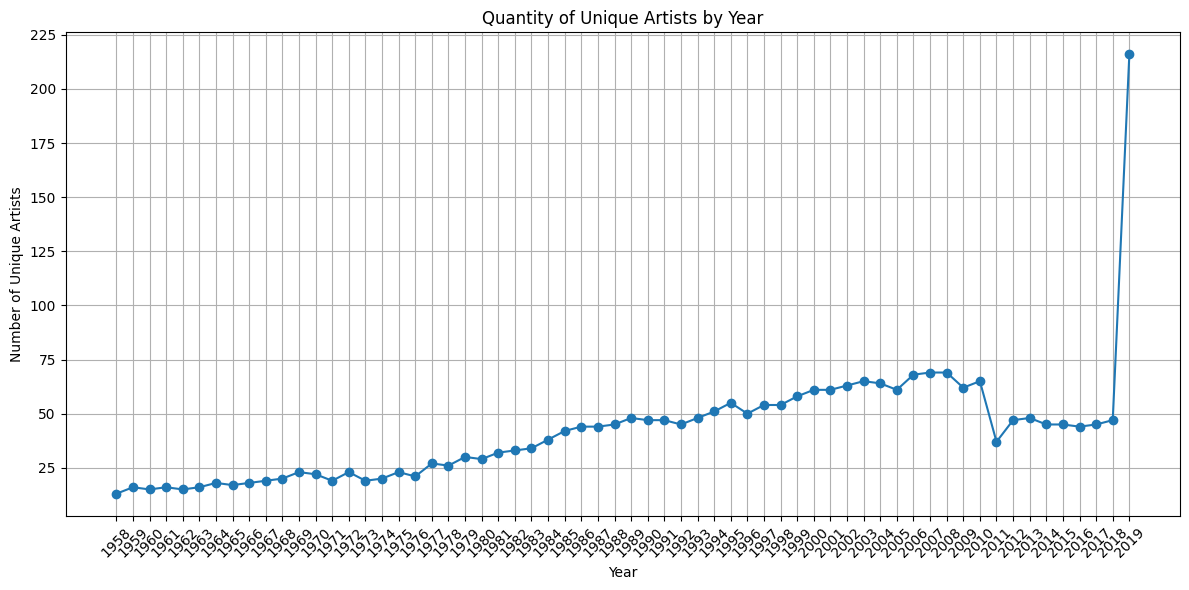

In [95]:
# Count unique artists by year
unique_artists_per_year = (
    grammy_data.groupby('year')['artist']  # Group the data by 'year' and select the 'artist' column
    .nunique()  # Count unique artists for each year
    .reset_index(name='unique_artist_count')  # Reset the index and rename the new column to 'unique_artist_count'
)

# Create a line chart to visualize the number of unique artists per year
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
plt.plot(unique_artists_per_year['year'], unique_artists_per_year['unique_artist_count'], marker='o')  # Plot the data with markers
plt.title('Quantity of Unique Artists by Year')  # Set the chart title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Number of Unique Artists')  # Label for the y-axis
plt.xticks(unique_artists_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability
plt.grid()  # Add a grid to the plot
plt.tight_layout()  # Adjust layout to make sure everything fits well
plt.show()  # Display the chart


- **🎶 Category Column Analysis**
    1. Data Preparation:
        - 📥 Extract the 'category' column from the dataset.
        - 👀 Preview the first 5 entries to understand its structure.

    2. Data Analysis:
        - 📊 Count unique categories by year.
        - 🏆 Group data by year and category to count winners.

    3. Visualization:
        - 📈 Create a line chart for unique categories by year.
        - 📅 Count total winners and unique categories per year.

    4. Results Compilation:
        - 🔗 Merge results into a single DataFrame for a comprehensive overview.
        - 🎤 Filter specific records for 'Song Of The Year' in 2019 to investigate category repetition.
        
    5. Display Results:
        - 🔍 Show filtered records for analysis.

In [97]:
# Extract the 'category' column from the grammy_data DataFrame
category_column = grammy_data['category']  # Store the 'category' data for analysis or manipulation


In [98]:
# Display the first 5 entries of the 'category' column
category_column.head(5)  # This command helps to preview the data in the 'category' column to understand its structure and values


0    Record Of The Year
1    Record Of The Year
2    Record Of The Year
3    Record Of The Year
4    Record Of The Year
Name: category, dtype: object

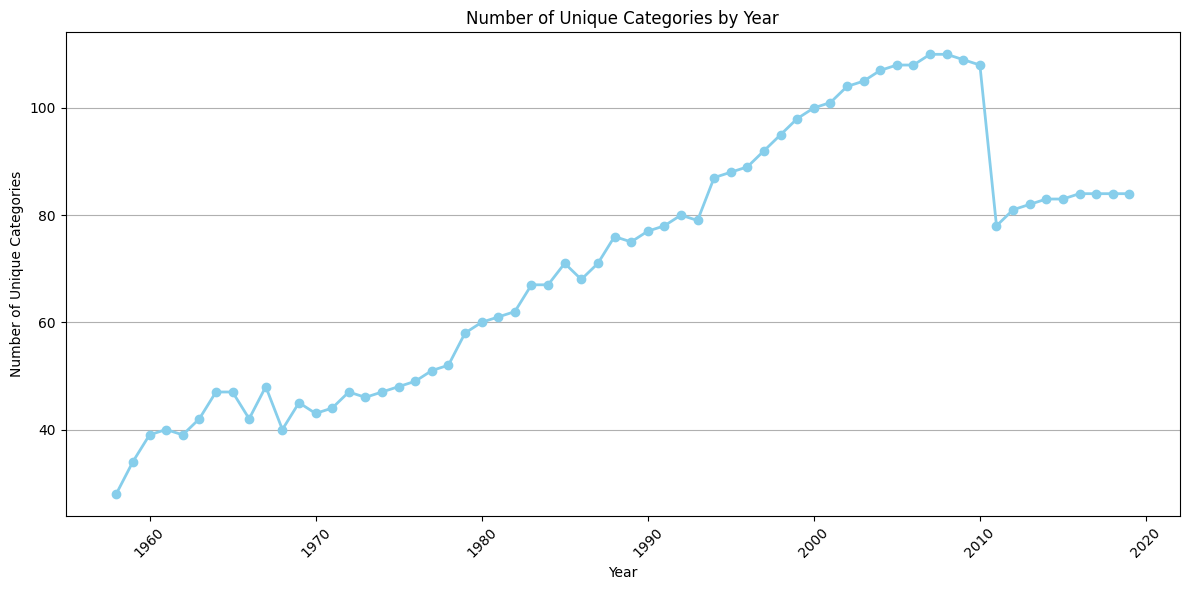

In [99]:
# Count the number of unique categories by year
unique_categories_per_year = grammy_data.groupby('year')['category'].nunique()  # Group the data by 'year' and count unique 'category' entries

# Create a line chart to visualize the number of unique categories per year
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
unique_categories_per_year.plot(kind='line', marker='o', color='skyblue', linewidth=2)  # Plot the line chart with specified aesthetics
plt.title('Number of Unique Categories by Year')  # Set the title of the chart
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Number of Unique Categories')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines to the y-axis

# Show the chart with tight layout adjustments
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the chart


In [100]:
# Group the data by year and category, counting the number of winners in each group
winners_per_year_category = grammy_data.groupby(['year', 'category']).size().reset_index(name='total_winners')

# Count the total number of winners per year
total_winners_per_year = winners_per_year_category.groupby('year')['total_winners'].sum().reset_index(name='total_winners')

# Count the total number of unique categories per year
total_categories_per_year = winners_per_year_category.groupby('year')['category'].nunique().reset_index(name='total_categories')

# Merge the results into a single DataFrame
final_result = total_winners_per_year.merge(total_categories_per_year, on='year')

# Display the final result
final_result


,year,total_winners,total_categories
0,1958,28,28
1,1959,35,34
2,1960,39,39
3,1961,41,40
4,1962,39,39
...,...,...,...
57,2015,84,83
58,2016,85,84
59,2017,86,84
60,2018,86,84


In [101]:
# Filter records for the category 'Song Of The Year' in the year 2019
# This is done to investigate why categories are repeated for the same edition,
# as the dataset is expected to contain only the winners.
song_of_the_year_2019 = grammy_data[(grammy_data['category'] == 'Song Of The Year') & (grammy_data['year'] == 2019)]

# Display the filtered records
song_of_the_year_2019.head(5)


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
16,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Bad Guy,None,"Billie Eilish O Connell & Finneas O Connell, songwriters (Billie Eilish)",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Billie%2BEilish/Billie%2520Eilish_1_1_1594138954.jpg?itok=3-71Dfxh,True
17,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Always Remember Us This Way,None,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lori McKenna, songwriters (Lady Gaga)",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Natalie%2BHemby/Natalie%2520Hemby_1_1_1591113039.jpg?itok=AKF_O3V1,True
18,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Bring My Flowers Now,None,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth & Tanya Tucker, songwriters (Tanya Tucker)",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Brandi%2BCarlile/Brandi%2520Carlile_1_1_1597247043.jpg?itok=5265JEVE,True
19,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Hard Place,None,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris, H.E.R. & Rodney Jerkins, songwriters (H.E.R.)",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Ruby%2BAmanfu/Ruby%2520Amanfu_1_1_1575355707.jpg?itok=b5G4Hn8y,True
20,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Lover,None,"Taylor Swift, songwriter (Taylor Swift)",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Taylor%2BSwift/Taylor%2520Swift_1_1_1588259933.jpg?itok=faoR37HC,True


- **Nominee Column 🎤**

    1. 🔍 Extract Data:
        - Retrieve the nominee column from the grammy_data DataFrame for analysis.
        
    2. 📊 Preview Data:
        - Display the first few entries of the nominee column to understand its structure and content.

    3. 🔢 Count Unique Records:
        - Count and display the number of unique nominees and their occurrences in the dataset.
        - 📅 Group and Analyze:
        - Group the data by year and nominee, counting the unique categories for each nominee.

    4. 📋 Filter Results:
        - Identify nominees that have been nominated in more than one category in the same year.

    5. 🔄 Aggregate Nominations:
        - Group by nominee to create lists of associated years and categories.

    6. 📅 Combine Year and Category:
        - Create a new column that combines years and categories into a single string for better readability.

    7. ❓ Check for Multiple Categories:
        - Define a function to check if any nominee has more than two categories in a single year.

    8. 📈 Filter Final Results:
        - Apply the function to filter nominees with multiple categories, and display the relevant results.

In [103]:
# Extract the 'nominee' column from the grammy_data DataFrame
nominee_column = grammy_data['nominee']  # Store the 'nominee' data for analysis or further manipulation


In [113]:
# Display the first 5 entries of the 'nominee' column
nominee_column.head(5)  # This command helps to preview the data in the 'nominee' column to understand its structure and values


0       Bad Guy
1       Hey, Ma
2       7 rings
3    Hard Place
4          Talk
Name: nominee, dtype: object

In [105]:
# Count the number of unique nominees in the 'nominee_column' column and display their respective counts
print(f"The count of unique nominees in the dataset and their respective quantities are as follows:\n{nominee_column.value_counts()}")
# This command helps to summarize how many unique nominees are present in the dataset along with their counts.


The count of unique nominee in the dataset and their respective quantities are as follows:
nominee
Robert Woods                                                 7
Berlioz: Requiem                                             7
Steven Epstein                                               7
Bridge Over Troubled Water                                   7
David Frost                                                  6
                                                            ..
Tchaikovsky: Piano Concerto No. 1 In B Flat Minor, Op. 23    1
Segovia Golden Jubilee                                       1
Beethoven: Quartet 130                                       1
Operatic Recital                                             1
Two Days In November                                         1
Name: count, Length: 4131, dtype: int64


In [107]:
# Group by 'year' and 'nominee', counting the unique categories for each nominee
nominations_per_year = (
    grammy_data.groupby(['year', 'nominee'])['category']  # Group by year and nominee
    .nunique()  # Count unique categories
    .reset_index()  # Reset index to turn the grouped data back into a DataFrame
)

# Filter to show nominees that have more than one category in the same year
multiple_categories_per_year = nominations_per_year[nominations_per_year['category'] > 1]

# Check if there are any nominees with multiple categories in the same year
has_multiple_categories = not multiple_categories_per_year.empty

# Return True or False depending on whether such nominees exist
print(f"Are there any albums nominated in different categories in the same year? {has_multiple_categories}")
# This prints whether any album has been nominated in different categories within the same year.


Are there any albums nominated in different categories in the same year? True


In [108]:
# Function to combine years and categories into a single string for each nominee
def combine_years_and_categories(row):
    """
    Combines years and associated categories for a nominee into a single string.
    
    Args:
        row (pd.Series): A row from the DataFrame containing lists of years and categories.
        
    Returns:
        str: A formatted string showing the nominee's years and categories.
    """
    year_category_map = {}  # Initialize a dictionary to map years to categories
    for year, category in zip(row['years_list'], row['categories_list']):
        if year not in year_category_map:
            year_category_map[year] = []  # Create a list of categories for that year
        year_category_map[year].append(category)  # Append the category to the corresponding year
    
    # Combine the year with all its categories into a single string
    combined = [f"{year}: {', '.join(categories)}" for year, categories in year_category_map.items()]
    
    return ', '.join(combined)  # Return the combined string


# Group by 'nominee' and create lists of years and associated categories
nominations_grouped_by_nominee = (
    grammy_data.groupby('nominee')  # Grouping the data by nominee
    .agg(
        years_list=('year', lambda x: list(x)),         # Create a list of years for each nominee
        categories_list=('category', lambda x: list(x))  # Create a list of categories for each nominee
    )
    .reset_index()
)

# Create a new column that combines years and categories
nominations_grouped_by_nominee['year_category_combined'] = nominations_grouped_by_nominee.apply(combine_years_and_categories, axis=1)

# Filter to show only those nominees who have been nominated in more than one year
filtered_repeated_nominations = nominations_grouped_by_nominee[nominations_grouped_by_nominee['years_list'].apply(lambda x: len(set(x)) > 1)]

# Show only the relevant columns
final_results = filtered_repeated_nominations[['nominee', 'year_category_combined']]

# Display the results
final_results


,nominee,year_category_combined
0,Round Midnight,"1992: Best Jazz Vocal Performance, 1986: Best Jazz Vocal Performance, Male"
101,A Taste Of Honey,"1978: Best New Artist, 1965: Record Of The Year, Best Instrumental Performance, Non-Jazz, Best Instrumental Arrangement, Best Engineered Recording - Non-Classical, 1962: Best Instrumental Theme"
202,All My Life,"2002: Best Hard Rock Performance, 1990: Best Pop Performance By A Duo Or Group With Vocal"
240,Amazing Grace,"1989: Best Country Instrumental Performance, 1981: Best Inspirational Performance, 1972: Best Soul Gospel Performance"
313,Arif Mardin,"2002: Producer Of The Year, Non-Classical, 1975: Best Producer Of The Year"
...,...,...
3959,West Side Story,"2009: Best Musical Show Album, 1985: Best Cast Show Album, 1961: Best Jazz Performance - Large Group (Instrumental), Best Sound Track Album Or Recording Of Original Cast From Motion Picture Or Television, 1960: Best Jazz Performance Solo Or Small Group"
3966,What Are You Doing The Rest Of Your Life?,"2005: Best Instrumental Arrangement Accompanying Vocalist(s), 1972: Best Arrangement Accompanying Vocalist(s)"
3987,When I Fall In Love,"1996: Best Pop Collaboration With Vocals, Best Instrumental Arrangement With Accompanying Vocal(s), 1993: Best Instrumental Arrangement Accompanying Vocal(s)"
3999,Where Is The Love,"1975: Best Rhythm & Blues Song, 1972: Best Pop Vocal Performance By A Duo, Group Or Chorus"


In [111]:
# Function to combine years and categories into a single formatted string for each nominee
def combine_years_categories(row):
    """
    Combines years and their corresponding categories for a nominee into a single string.
    
    Args:
        row (pd.Series): A row from the DataFrame containing lists of years and categories.
        
    Returns:
        str: A formatted string showing the nominee's years and categories.
    """
    year_category_map = {}  # Initialize a dictionary to map years to categories
    for year, category in zip(row['years'], row['categories']):
        year_category_map.setdefault(year, []).append(category)  # Add categories to the corresponding year

    # Create a formatted string combining years and their associated categories
    return ', '.join([f"{year}: {', '.join(categories)}" for year, categories in year_category_map.items()])

# Group by 'nominee' and aggregate years and categories into lists
repeated_nominations = (
    grammy_data.groupby('nominee')
    .agg(years=('year', list), categories=('category', list))  # Create lists of years and categories for each nominee
    .reset_index()  # Reset the index to convert the GroupBy object back to a DataFrame
)

# Create a new column in the DataFrame that contains the combined years and categories
repeated_nominations['year_category'] = repeated_nominations.apply(combine_years_categories, axis=1)

# Display the general result for nominations
print("General Nominations:\n")
general_result = repeated_nominations[['nominee', 'year_category']]  # Select relevant columns for display
general_result.head(5)  # Show the first 5 results


General Nominations:



,nominee,year_category
0,Round Midnight,"1992: Best Jazz Vocal Performance, 1986: Best Jazz Vocal Performance, Male"
1,Til Summer Comes Around,2010: Best Male Country Vocal Performance
2,#Eldisco,2019: Best Latin Pop Album
3,(Everything I Do) I Do It For You (From Robin Hood - Prince Of Thieves),1991: Best Song Written Specifically For A Motion Picture Or For Television
4,(Go) Get It,2000: Best Jazz Instrumental Solo


In [112]:
# Function to check if a nominee has multiple categories in the same year
def has_multiple_categories_in_same_year(row):
    """
    Determines if a nominee has more than two categories in the same year.
    
    Args:
        row (pd.Series): A row from the DataFrame containing lists of years and categories.
        
    Returns:
        bool: True if the nominee has more than two categories in any single year, False otherwise.
    """
    from collections import defaultdict
    year_category_count = defaultdict(set)  # Initialize a dictionary to count categories per year
    for year, category in zip(row['years'], row['categories']):
        year_category_count[year].add(category)  # Add the category to the corresponding year

    # Check if any year has more than 2 unique categories
    return any(len(categories) > 2 for categories in year_category_count.values())

# Apply the filter to get nominees with more than two categories in the same year
filtered_result = repeated_nominations[repeated_nominations.apply(has_multiple_categories_in_same_year, axis=1)][['nominee', 'year_category']]

# Display the filtered results
print("\nNominations with more than 2 categories in the same year:\n")
filtered_result.head(5)  # Show the first 5 filtered results



Nominations with more than 2 categories in the same year:



,nominee,year_category
30,24K Magic,"2017: Record Of The Year, Album Of The Year, Best R&B Album, Best Engineered Album, Non-Classical"
101,A Taste Of Honey,"1978: Best New Artist, 1965: Record Of The Year, Best Instrumental Performance, Non-Jazz, Best Instrumental Arrangement, Best Engineered Recording - Non-Classical, 1962: Best Instrumental Theme"
130,Adams: On The Transmigration Of Souls,"2004: Best Classical Album, Best Orchestral Performance, Best Classical Contemporary Composition"
220,Almost Persuaded,"1966: Best Country & Western Recording, Best Country & Western Vocal Performance, Male, Best Country & Western Song"
233,Always On My Mind,"1982: Song Of The Year, Best Country Vocal Performance, Male, Best Country Song"


- Years Column 📅
    1. Extract Year Data 📊
        - Retrieve the 'year' column from the dataset.

    2. Sort Values 🔄
        - Organize the years in ascending order.

    3. Define Check Function 🛠️
        - Create a function to verify nominations for each year.

    4. Execute Year Check ✅
        - Call the function to determine if nominations exist for all years in the dataset.

    5. Display Result 📈
        - Print the outcome of the checks to understand the coverage of nominations over the years.

In [35]:
# Extract the 'year' column from the grammy_data DataFrame and sort the values
years_column = grammy_data['year'].sort_values()  # This line retrieves the 'year' column and sorts the values in ascending order for better analysis or visualization.


In [114]:
# Display the first 5 entries of the sorted 'years' column
years_column.head(5)  # This command helps to preview the sorted data in the 'year' column to understand its structure and values.


4809    1958
4605    1958
4551    1958
4808    1958
4784    1958
Name: year, dtype: object

In [115]:
# Function to check if there are nominations for all years in the dataset
def check_nominations_all_years(grammy_data):
    """
    Check if there are nominations for every year within the range of the dataset.

    Args:
        grammy_data (DataFrame): The DataFrame containing Grammy nominations data with a 'year' column.

    Returns:
        bool: True if nominations exist for all years, False otherwise.
    """
    unique_years = grammy_data['year'].unique()  # Extract unique years from the 'year' column
    year_range = range(unique_years.min(), unique_years.max() + 1)  # Create a range of years from the minimum to the maximum
    result = all(year in unique_years for year in year_range)  # Check if all years in the range have nominations
    print("Are there nominations for all years?", result)  # Print the result
    return result  # Return the result of the check

# Call the function to check for nominations
has_nominations = check_nominations_all_years(grammy_data)  # Store the result of the function call


Are there nominations for all years? True


- **Title Column 📖**

    1. Extract Title Data 📊
        - Retrieve and preview the title information from the dataset.

    2. Analyze Titles 🔍
        - Count unique titles and compare their quantity with unique years.

    3. Extract Year from Titles 📅
        - Implement a function to identify and extract years from the titles.

    4. Verify Year Consistency ✅
        - Check if extracted years match the actual years in the dataset.

In [116]:
# Extract the 'title' column from the grammy_data DataFrame
title_column = grammy_data['title']  # Store the 'title' data for analysis or manipulation


In [117]:
# Display the first 5 entries of the 'title' column
title_column.head(5)  # This command helps to preview the data in the 'title' column to understand its structure and values


0    62nd Annual GRAMMY Awards  (2019)
1    62nd Annual GRAMMY Awards  (2019)
2    62nd Annual GRAMMY Awards  (2019)
3    62nd Annual GRAMMY Awards  (2019)
4    62nd Annual GRAMMY Awards  (2019)
Name: title, dtype: object

In [118]:
# Count of unique titles in the 'title' column and display their quantities
print(f"The count of unique titles in the dataset and their respective quantities are as follows:\n{title_column.value_counts()}")


The count of unique titles in the dataset and their respective quantities are as follows:
title
62nd Annual GRAMMY Awards  (2019)    433
50th Annual GRAMMY Awards  (2007)    111
51st Annual GRAMMY Awards  (2008)    111
49th Annual GRAMMY Awards  (2006)    110
52nd Annual GRAMMY Awards  (2009)    109
                                    ... 
11th Annual GRAMMY Awards  (1968)     40
5th Annual GRAMMY Awards  (1962)      39
3rd Annual GRAMMY Awards  (1960)      39
2nd Annual GRAMMY Awards  (1959)      35
1st Annual GRAMMY Awards  (1958)      28
Name: count, Length: 62, dtype: int64


In [119]:
# Check if the number of unique titles is the same as the number of unique years
unique_titles_count = title_column.nunique()  # Count of unique titles
unique_years_count = years_column.nunique()    # Count of unique years
# Print the result of the comparison
print(f"Are there the same number of unique titles as unique years? {unique_titles_count == unique_years_count}")


Are there the same number of unique titles as unique years? True


In [120]:
# Function to extract the year from a title that is enclosed in parentheses
def extract_year_from_title(title):
    """
    Extracts a year in the format (YYYY) from the given title string.
    
    Args:
        title (str): The title string from which to extract the year.
        
    Returns:
        int or None: Returns the extracted year as an integer if found, otherwise None.
    """
    match = re.search(r'\((\d{4})\)', title)  # Search for a year in the format (YYYY)
    return int(match.group(1)) if match else None  # Return the year if found

# Function to check if all extracted years match the year in the dataset
def check_years_match(grammy_data):
    """
    Checks if all extracted years from titles match the corresponding year in the dataset.
    
    Args:
        grammy_data (DataFrame): The DataFrame containing the Grammy data.
        
    Returns:
        bool: Returns True if all years match, otherwise False.
    """
    mismatch = grammy_data[grammy_data['year_match'] == False]  # Get mismatches
    result = mismatch.empty  # True if there are no mismatches, False otherwise
    return result

# Apply the function to the 'title' column
grammy_data['extracted_year'] = grammy_data['title'].apply(extract_year_from_title)

# Compare the extracted year with the year from the 'year' column
grammy_data['year_match'] = grammy_data['extracted_year'] == grammy_data['year']

# Call the function and display the result
print("Do all years in the titles correspond to the year column?", check_years_match(grammy_data))


Do all years in the titles correspond to the year column? True


- **Workers Column 🛠️**
    1. Create Masks 🔍
        - Identify rows with empty parentheses in the "workers" column.
        - Identify rows where the "artist" field is empty or NaN.

    2. Combine Filters ➕
        - Merge both conditions to find rows that meet either criterion.

    3. Filter Data 📊
        - Extract relevant data from the original DataFrame based on the combined filter.
        
    4. Display Results 📋
        - Show the filtered results for review.

In [43]:
# Extract the 'workers' column from the grammy_data DataFrame
workers_column = grammy_data['workers']  # Store the 'workers' data for analysis or manipulation


In [121]:
# Display the first 5 entries of the 'workers' column
workers_column.head(5)  # This command helps to preview the data in the 'workers' column to understand its structure and values


0                                                                               Finneas O Connell, producer  Rob Kinelski & Finneas O Connell, engineers/mixers  John Greenham, mastering engineer
1                                         BJ Burton, Brad Cook, Chris Messina & Justin Vernon, producers  BJ Burton, Zach Hanson & Chris Messina, engineers/mixers  Greg Calbi, mastering engineer
2       Charles Anderson, Tommy Brown, Michael Foster & Victoria Monet, producers  Serban Ghenea, John Hanes, Billy Hickey & Brendan Morawski, engineers/mixers  Randy Merrill, mastering engineer
3                                            Rodney “Darkchild” Jerkins, producer  Joseph Hurtado, Jaycen Joshua, Derek Keota & Miki Tsutsumi, engineers/mixers  Colin Leonard, mastering engineer
4    Disclosure & Denis Kosiak, producers  Ingmar Carlson, Jon Castelli, Josh Deguzman, John Kercy, Denis Kosiak, Guy Lawrence & Michael Romero, engineers/mixers  Dale Becker, mastering engineer
Name: workers, dtype: obj

In [124]:
# Create a mask for rows where 'workers' contains empty parentheses
empty_parentheses_mask = grammy_data['workers'].str.contains(r'\(\s*\)', na=False)

# Create a mask for rows where 'artist' is empty or NaN
empty_artist_mask = grammy_data['artist'].isna() | (grammy_data['artist'] == '')

# Combine both masks using OR (|) to filter rows that meet either condition
combined_filter_mask = empty_parentheses_mask | empty_artist_mask  # Using | instead of &

# Apply the combined mask to the DataFrame and select only the 'workers', 'artist', and 'category' columns
filtered_result = grammy_data.loc[combined_filter_mask, ['workers', 'artist', 'category']]

# Display the filtered result
filtered_result.head(5)  # Show the first 5 rows of the filtered DataFrame


,workers,artist,category
16,"Billie Eilish O Connell & Finneas O Connell, songwriters (Billie Eilish)",None,Song Of The Year
17,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lori McKenna, songwriters (Lady Gaga)",None,Song Of The Year
18,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth & Tanya Tucker, songwriters (Tanya Tucker)",None,Song Of The Year
19,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris, H.E.R. & Rodney Jerkins, songwriters (H.E.R.)",None,Song Of The Year
20,"Taylor Swift, songwriter (Taylor Swift)",None,Song Of The Year


- **Winner Column Analysis 🎖️**

    1. Extract Winner Data 📝
        - Retrieve the 'winner' column from the dataset to analyze the winning entries.

    2. Filter by Year 🔍
        - Focus on a specific year (e.g., 2019) to examine the winners of that year.

    3. Display Results 📊
        - Show the first few entries of the filtered data to understand the winners for the selected year.

    4. Analyze Trends 📈
        - Investigate how the number of winners compares to categories for the chosen year.

In [125]:
# Extract the 'winner' column from the grammy_data DataFrame
winner_column = grammy_data['winner']  # This stores the winner data for analysis


In [126]:
# Display the first 5 entries of the 'winner' column
winner_column.head(5)  # This command helps to preview the data in the 'winner' column to understand its structure and values


0    True
1    True
2    True
3    True
4    True
Name: winner, dtype: object

- 📅 I want to examine the data behavior specifically for the year 2015. 
- 🎉 In this range of years, there are 2 or 3 more winners than the number of categories. 
- 🤔 I'm interested in exploring why this discrepancy exists when compared to other years, 
- where the number of winners often triples the number of nominated categories. 


In [127]:
# Filter the DataFrame to get the rows where the year is 2015
winners_2015 = grammy_data[grammy_data['year'] == 2015]  # Select only the records for the year 2015

# Display all rows for the winners of 2015
winners_2015.head(5)  # This command helps to preview the data for the winners in 2015


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner,extracted_year,year_match
659,2015,58th Annual GRAMMY Awards (2015),2017-11-28T00:03:45-08:00,2019-09-10T01:09:02-07:00,Best Pop Solo Performance,Thinking Out Loud,Ed Sheeran,None,https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Ed%2BSheeran/Ed%2520Sheeran_1_1_1594056948.jpg?itok=On8YTR-K,True,2015,True
697,2015,58th Annual GRAMMY Awards (2015),2017-11-28T00:03:45-08:00,2019-09-10T01:09:02-07:00,Record Of The Year,Uptown Funk,Mark Ronson Featuring Bruno Mars,"Jeff Bhasker, Philip Lawrence, Bruno Mars & Mark Ronson, producers Josh Blair, Riccardo Damian, Serban Ghenea, Wayne Gordon, John Hanes, Inaam Haq, Boo Mitchell, Charles Moniz & Mark Ronson, engineers/mixers Tom Coyne, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Mark%2BRonson/Mark%2520Ronson_1_1_1596790481.jpg?itok=s-dqiJed,True,2015,True
698,2015,58th Annual GRAMMY Awards (2015),2017-11-28T00:03:45-08:00,2019-09-10T01:09:02-07:00,Album Of The Year,1989,Taylor Swift,"Jack Antonoff, Nathan Chapman, Imogen Heap, Max Martin, Mattman & Robin, Ali Payami, Shellback, Taylor Swift, Ryan Tedder & Noel Zancanella, producers Jack Antonoff, Mattias Bylund, Smith Carlson, Nathan Chapman, Serban Ghenea, John Hanes, Imogen Heap, Sam Holland, Michael Ilbert, Brendan Morawski, Laura Sisk & Ryan Tedder, engineers/mixers Tom Coyne, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Taylor%2BSwift/Taylor%2520Swift_1_1_1588259933.jpg?itok=faoR37HC,True,2015,True
699,2015,58th Annual GRAMMY Awards (2015),2017-11-28T00:03:45-08:00,2019-09-10T01:09:02-07:00,Song Of The Year,Thinking Out Loud,None,"Ed Sheeran & Amy Wadge, songwriters (Ed Sheeran)",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Ed%2BSheeran/Ed%2520Sheeran_1_1_1594056948.jpg?itok=On8YTR-K,True,2015,True
700,2015,58th Annual GRAMMY Awards (2015),2017-11-28T00:03:45-08:00,2019-09-10T01:09:02-07:00,Best New Artist,Meghan Trainor,None,None,None,True,2015,True


In [128]:
# Filter the DataFrame to obtain the rows where the year is 2019.
# This focuses the analysis on the winners from that specific year.
winners_2019 = grammy_data[grammy_data['year'] == 2019]

# Display the first 5 rows for the winners of 2019.
# This provides a quick overview of the winning nominees.
winners_2019.head(5)


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner,extracted_year,year_match
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O Connell, producer Rob Kinelski & Finneas O Connell, engineers/mixers John Greenham, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Billie%2BEilish/Billie%2520Eilish_1_1_1594138954.jpg?itok=3-71Dfxh,True,2019,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin Vernon, producers BJ Burton, Zach Hanson & Chris Messina, engineers/mixers Greg Calbi, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Bon%2BIver/Bon%2520Iver_1_1_1578385181.jpg?itok=_M1hc5Ux,True,2019,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster & Victoria Monet, producers Serban Ghenea, John Hanes, Billy Hickey & Brendan Morawski, engineers/mixers Randy Merrill, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Ariana%2BGrande/Ariana%2520Grande_1_1_1578384678.jpg?itok=Amj90j13,True,2019,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer Joseph Hurtado, Jaycen Joshua, Derek Keota & Miki Tsutsumi, engineers/mixers Colin Leonard, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/H.E.R./H.E.R._1_1_1594631035.jpg?itok=ClJe-2MN,True,2019,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers Ingmar Carlson, Jon Castelli, Josh Deguzman, John Kercy, Denis Kosiak, Guy Lawrence & Michael Romero, engineers/mixers Dale Becker, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Khalid/Khalid_1_1_1594578772.jpg?itok=2HxjAT-X,True,2019,True
